<a href="https://colab.research.google.com/github/filladani/PCVK_2024/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

Tugas No 1

Gamma Correction pada citra
-----------------------------
Masukkan nilai gamma: 5


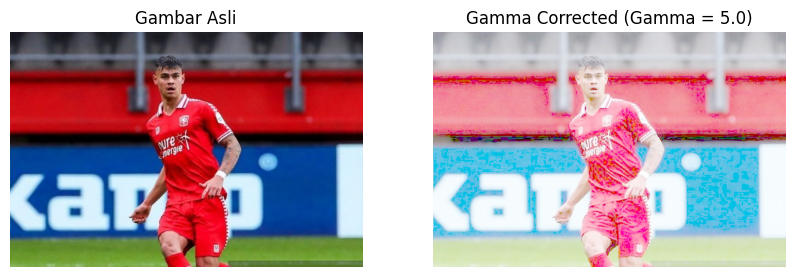

In [ ]:
# Baca gambar dari Google Drive
image_path = '/content/drive/MyDrive/PCVK/images/mees.jpg'  # Ganti sesuai path gambar
image = cv.imread(image_path)

# Fungsi untuk koreksi gamma
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv.LUT(image, table)

# Koreksi gamma pada gambar
print('Gamma Correction pada citra')
print('-----------------------------')
try:
    gamma = float(input('Masukkan nilai gamma: '))
    adjusted_image = adjust_gamma(image, gamma)

    # Tampilkan gambar asli dan hasil koreksi gamma
    plt.figure(figsize=(10, 5))

    # Gambar Asli
    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title('Gambar Asli')
    plt.axis('off')

    # Gambar Hasil Koreksi Gamma
    plt.subplot(1, 2, 2)
    plt.imshow(cv.cvtColor(adjusted_image, cv.COLOR_BGR2RGB))
    plt.title(f'Gamma Corrected (Gamma = {gamma})')
    plt.axis('off')

    plt.show()

except ValueError:
    print('Error, nilai yang dimasukkan bukan angka')


Tugas No 2

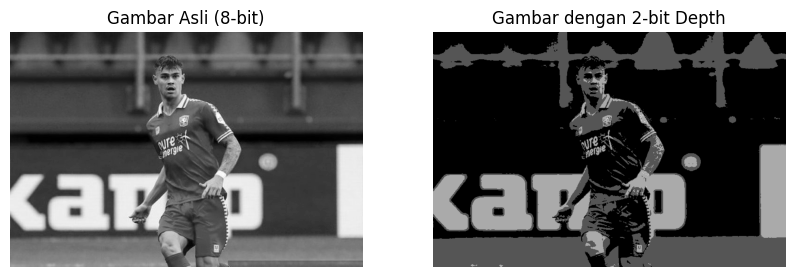

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Parameter bit depth
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

# Membaca gambar grayscale
original = cv.imread('/content/drive/MyDrive/PCVK/images/mees.jpg', cv.IMREAD_GRAYSCALE)

# Mengecek apakah gambar berhasil dimuat
if original is None:
    print("Gambar tidak ditemukan atau tidak dapat dibuka.")
else:
    # Menginisialisasi depth_image sesuai dengan ukuran dan tipe data gambar asli
    depth_image = np.zeros(original.shape, original.dtype)

    # Mengonversi gambar ke kedalaman bit yang lebih rendah
    depth_image = (original / level).astype(np.uint8) * level

    # Menampilkan gambar asli dan gambar hasil perubahan bit depth
    plt.figure(figsize=(10, 5))

    # Gambar Asli
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Gambar Asli (8-bit)')
    plt.axis('off')

    # Gambar dengan bit depth yang diubah
    plt.subplot(1, 2, 2)
    plt.imshow(depth_image, cmap='gray')
    plt.title(f'Gambar dengan {bit_depth}-bit Depth')
    plt.axis('off')

    plt.show()


Tugas no 3

In [ ]:
import glob
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Polinema/Kuliah/PCVK/
Images/noises/*.jpg'):
n= cv.imread(img)
cv_img.append(n)

Tugas no 4

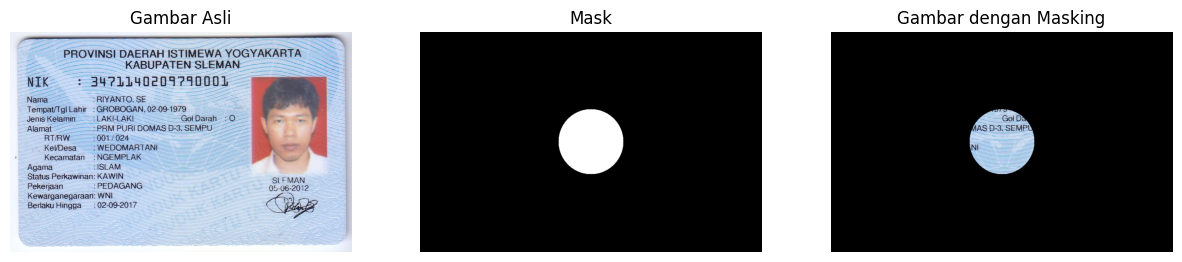

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar
image = cv2.imread('/content/drive/MyDrive/PCVK/images/ktp.png')

# Membuat mask dengan ukuran yang sama seperti gambar asli, dengan nilai 0 (hitam)
mask = np.zeros(image.shape[:2], dtype="uint8")

# Membuat lingkaran putih di mask (posisi, radius, warna, dan ketebalan)
cv2.circle(mask, (image.shape[1]//2, image.shape[0]//2), 100, 255, -1)

# Terapkan mask ke gambar dengan bitwise AND
masked_image = cv2.bitwise_and(image, image, mask=mask)

# Menampilkan gambar asli, mask, dan hasil masked image
plt.figure(figsize=(15, 5))

# Gambar Asli
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

# Mask (Biner)
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('off')

# Gambar dengan Mask
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.title('Gambar dengan Masking')
plt.axis('off')

plt.show()